In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'c:\Windows\Fonts\malgun.ttf' # 폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False) # 마이너스 표기
# 레티나 폰트로 선명하게
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 차원 축소

## 2차원을 1차원으로

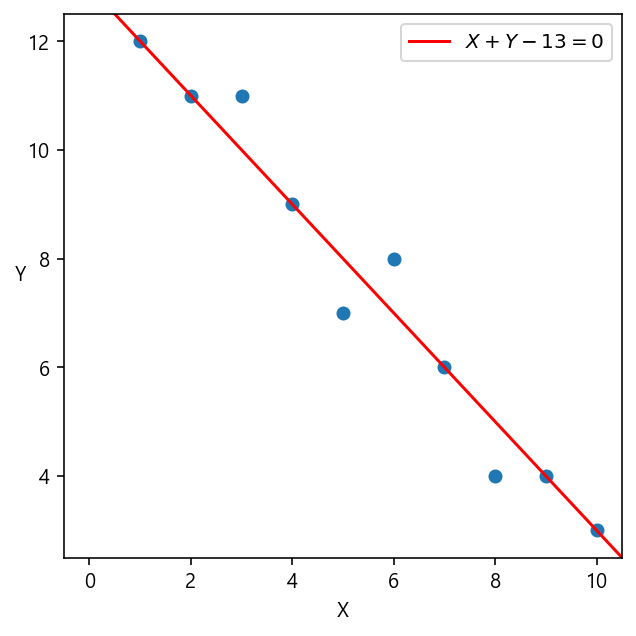

In [13]:
plt.figure(figsize=(5,5))
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12, 11, 11, 9, 7, 8, 6, 4, 4, 3])
plt.scatter(x, y)
plt.plot(np.linspace(0, 11, 200), np.linspace(13, 2, 200), 'r-', label='$X+Y-13=0$')
plt.axis([-0.5, 10.5, 2.5, 12.5])
plt.legend()
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

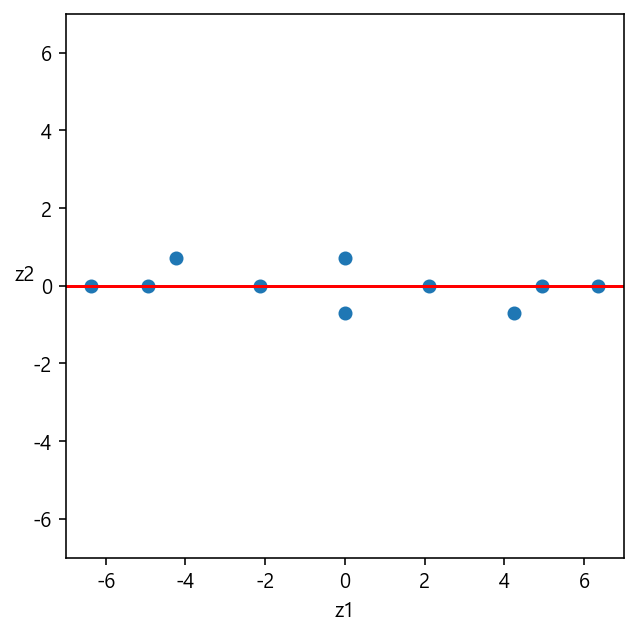

In [14]:
plt.figure(figsize=(5,5))
plt.scatter((x-np.mean(x))*np.cos(np.pi/4)-(y-np.mean(y))*np.sin(np.pi/4),(x-np.mean(x))*np.cos(np.pi/4)+(y-np.mean(y))*np.sin(np.pi/4))
plt.axhline(y=0, color='r')
plt.axis([-7, 7, -7, 7])
plt.xlabel('z1')
plt.ylabel('z2', rotation=0)
plt.show()

+ z2축은 의미가 z1축에 비해 상대적으로 매우 작으므로 2차원을 1차원으로 표현할 수 있습니다.

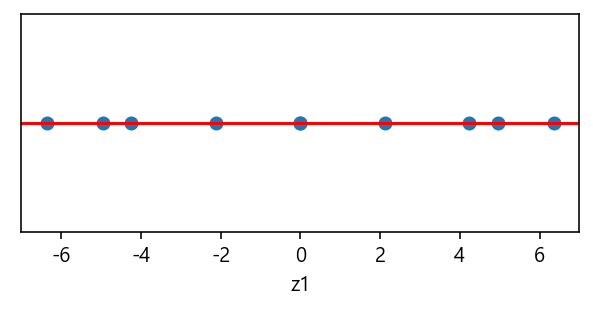

In [15]:
plt.figure(figsize=(5,2))
plt.scatter((x-np.mean(x))*np.cos(np.pi/4)-(y-np.mean(y))*np.sin(np.pi/4), np.array([0]*10))
plt.axhline(y=0, color='r')
plt.axis([-7, 7, -7, 7])
plt.xlabel('z1')
plt.gca().axes.yaxis.set_visible(False)
plt.ylabel('z2', rotation=0)
plt.show()

## 3차원을 1차원으로

+ 칼라사진 클릭시 RGB 추출 (cv2는 BGR순서!)

In [16]:
import sys
import cv2
import numpy as np

img = cv2.imread('images/flowers.jpg')
img = cv2.resize(img, dsize=(0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)

cv2.imshow('img', img)
cv2.moveWindow('img', 150, 150)

# r = img[:, :, 2]
# g = img[:, :, 1]
# b = img[:, :, 0]

gray = np.array((0.94 * img[:, :, 2]) + (0.03 * img[:, :, 1]) + (0.03 * img[:, :, 0]), dtype = np.uint8)
cv2.imshow('gray', gray)
cv2.moveWindow('gray', 900, 150)

def mouse_click(e, x, y, flgs, param):
    if e == cv2.EVENT_FLAG_LBUTTON:
        print('Coordinate :', x, y)
        print('BGR :', img[y][x])
    
cv2.setMouseCallback('img', mouse_click, img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
print(255 * 0.03)
print(220 * 0.03 + 118 * 0.03)

7.6499999999999995
10.14


In [18]:
print((32**2 + 118**2)**0.5)

122.2620137246234


+ 차원을 줄임으로써 꽃이라는 객체를 판단하는데에는 무리가 없습니다.
+ 그러나 손실된 정보로 인해 붉은색 꽃과 노란색 꽃을 구별할 수 없습니다.

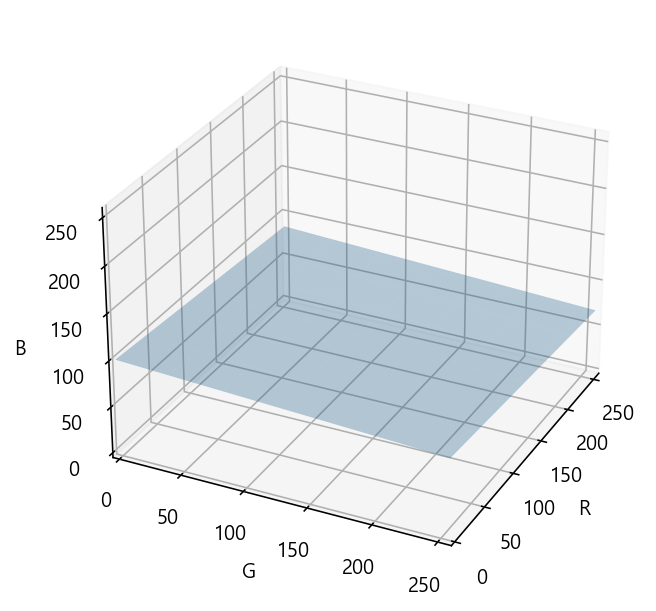

In [19]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

xx = np.linspace(0 - 2, 255 + 2, 50)
yy = np.linspace(0 - 2, 255 + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (-XX - YY)/(94/6) + 100
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.set_xlim3d(0, 255)
ax.set_ylim3d(0, 255)
ax.set_zlim3d(255, 0)
plt.show()

# PCA

+ 위에서 구한 z1축은 올바른 축이라고 할 수 있나요?
+ PCA는 분산의 설명력이 가장 큰 축부터 찾아 나가는 방법입니다.

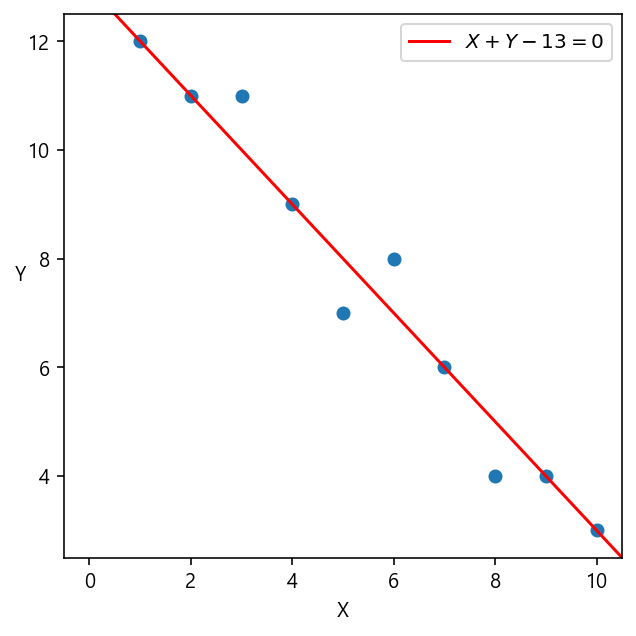

In [20]:
plt.figure(figsize=(5,5))
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12, 11, 11, 9, 7, 8, 6, 4, 4, 3])
plt.scatter(x, y)
plt.plot(np.linspace(0, 11, 200), np.linspace(13, 2, 200), 'r-', label='$X+Y-13=0$')
plt.axis([-0.5, 10.5, 2.5, 12.5])
plt.legend()
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

In [37]:
total_variance = 0
for a, b in zip((x-np.mean(x)), (y-np.mean(y))):
    total_variance += a**2+b**2
total_variance /= 9
print('x축의 분산 :', np.var(x, ddof=1))
print('y축의 분산 :', np.var(y, ddof=1))
print('총 분산 :', total_variance)

x축의 분산 : 9.166666666666666
y축의 분산 : 10.5
총 분산 : 19.666666666666668


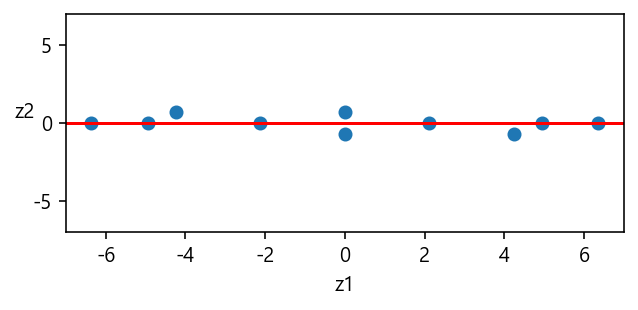

In [22]:
plt.figure(figsize=(5,2))
plt.scatter((x-np.mean(x))*np.cos(np.pi/4)-(y-np.mean(y))*np.sin(np.pi/4),(x-np.mean(x))*np.cos(np.pi/4)+(y-np.mean(y))*np.sin(np.pi/4))
plt.axhline(y=0, color='r')
plt.axis([-7, 7, -7, 7])
plt.xlabel('z1')
plt.ylabel('z2', rotation=0)
plt.show()

In [38]:
z1_variance = sum(((x-np.mean(x))*np.cos(np.pi/4)-(y-np.mean(y))*np.sin(np.pi/4))**2)/9
z2_variance = sum(((x-np.mean(x))*np.cos(np.pi/4)+(y-np.mean(y))*np.sin(np.pi/4))**2)/9
print('z1 축의 분산 :', z1_variance)
print('z2 축의 분산 :', z2_variance)

z1 축의 분산 : 19.444444444444443
z2 축의 분산 : 0.2222222222222222


+ 기존 8.25와 9.45에서 17.5와 0.2로 차이를 벌렸습니다.
+ 첫번째 축의 분산을 더 키울 수 있을까요?

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca_points = pca.fit_transform(np.array([x,y]).T)
print(pca_points)

[[-6.36014621  0.22031841]
 [-4.94678038  0.17135877]
 [-4.2645773  -0.55980397]
 [-2.12004874  0.07343947]
 [ 0.02447982  0.70668291]
 [-0.02447982 -0.70668291]
 [ 2.12004874 -0.07343947]
 [ 4.2645773   0.55980397]
 [ 4.94678038 -0.17135877]
 [ 6.36014621 -0.22031841]]


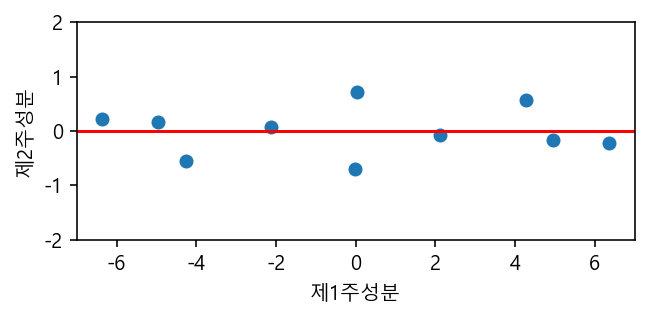

In [25]:
plt.figure(figsize=(5, 2))
plt.axis([-7, 7, -2, 2])
plt.axhline(y=0, color='r')
plt.scatter(pca_points[:, 0], pca_points[:, 1])
plt.xlabel('제1주성분')
plt.ylabel('제2주성분')
plt.show()

In [33]:
print('제 1주성분의 분산 :', sum(pca_points[:, 0]**2)/9)
print('제 2주성분의 분산 :', sum(pca_points[:, 1]**2)/9)
print('총 분산 :', sum(pca_points[:, 0]**2)/9 + sum(pca_points[:, 1]**2)/9)

제 1주성분의 분산 : 19.467538086947812
제 2주성분의 분산 : 0.19912857971885056
총 분산 : 19.66666666666666


In [32]:
pca.explained_variance_

array([19.46753809,  0.19912858])

In [39]:
print('분산의 비율 :', pca.explained_variance_ratio_)
print('검산 :', sum(pca_points[:, 0]**2)/9/17.7, sum(pca_points[:, 1]**2)/9/17.7)

분산의 비율 : [0.98987482 0.01012518]
검산 : 1.099860908867108 0.011250202244002857


In [52]:
print('주성분 벡터 :')
print(pca.components_)

주성분 벡터 :
[[ 0.68220309 -0.73116274]
 [-0.73116274 -0.68220309]]


In [54]:
print('주성분의 크기 :', (pca.components_[0][0]**2 + pca.components_[0][1]**2) ** 0.5)

주성분의 크기 : 1.0


In [55]:
print('주성분과의 내적 :', pca.components_[0] @ pca.components_[1].T)

주성분과의 내적 : 0.0


In [56]:
print('회전각 :', np.arccos(pca.components_[0][0])*180/np.pi)

회전각 : 46.98395906899344


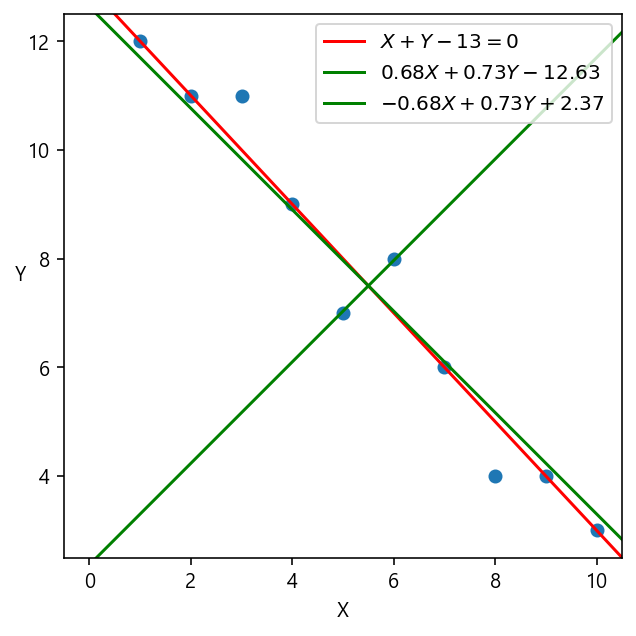

In [78]:
plt.figure(figsize=(5,5))
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12, 11, 11, 9, 7, 8, 6, 4, 4, 3])
plt.scatter(x, y)
new_x = np.linspace(0, 11, 200)
new_y = new_x * pca.components_[0][0] / pca.components_[0][1] - pca.components_[0][0] / pca.components_[0][1] * np.mean(x) + np.mean(y)
new_y2 = -new_x * pca.components_[0][0] / pca.components_[0][1] + pca.components_[0][0] / pca.components_[0][1] * np.mean(x) + np.mean(y)
plt.plot(np.linspace(0, 11, 200), np.linspace(13, 2, 200), 'r-', label='$X+Y-13=0$')
plt.plot(new_x, new_y, 'g-', label='$0.68X+0.73Y-12.63$')
plt.plot(new_x, new_y2, 'g-', label='$-0.68X+0.73Y+2.37$')
# plt.plot
plt.axis([-0.5, 10.5, 2.5, 12.5])
plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

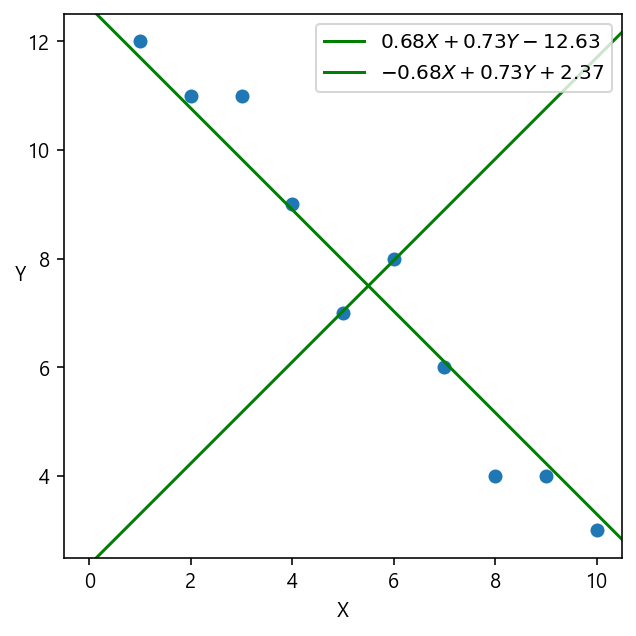

In [80]:
plt.figure(figsize=(5,5))
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([12, 11, 11, 9, 7, 8, 6, 4, 4, 3])
plt.scatter(x, y)
new_x = np.linspace(0, 11, 200)
new_y = new_x * pca.components_[0][0] / pca.components_[0][1] - pca.components_[0][0] / pca.components_[0][1] * np.mean(x) + np.mean(y)
new_y2 = -new_x * pca.components_[0][0] / pca.components_[0][1] + pca.components_[0][0] / pca.components_[0][1] * np.mean(x) + np.mean(y)
plt.plot(new_x, new_y, 'g-', label='$0.68X+0.73Y-12.63$')
plt.plot(new_x, new_y2, 'g-', label='$-0.68X+0.73Y+2.37$')
# plt.plot
plt.axis([-0.5, 10.5, 2.5, 12.5])
plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

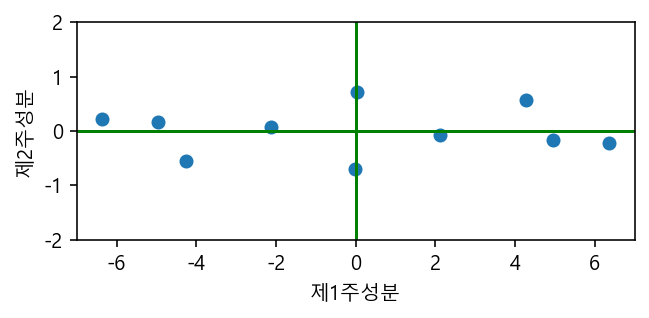

In [81]:
plt.figure(figsize=(5, 2))
plt.axis([-7, 7, -2, 2])
plt.axhline(y=0, color='g')
plt.axvline(x=0, color='g')
plt.scatter(pca_points[:, 0], pca_points[:, 1])
plt.xlabel('제1주성분')
plt.ylabel('제2주성분')
plt.show()

+ SVD 행렬 분해

In [89]:
U, s, Vt= np.linalg.svd(np.cov(x, y))
print(U)
print()
print(s)
print()
print(Vt)

[[-0.68220309  0.73116274]
 [ 0.73116274  0.68220309]]

[19.46753809  0.19912858]

[[-0.68220309  0.73116274]
 [ 0.73116274  0.68220309]]
